In [137]:
# import here 

import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
from matplotlib.lines import Line2D

plt.rcParams["font.family"] = "arial"

from matplotlib import style
%config InlineBackend.figure_format = 'retina'

style.use("default")

%matplotlib inline

In [138]:
# Import experimental data

geags_data = pd.read_csv("exp_data_2.csv")
time = geags_data["Time (min)"].to_numpy()
A1 = geags_data["A1"].to_numpy()
A2 = geags_data["A2"].to_numpy()
A3 = geags_data["A3"].to_numpy()
B1 = geags_data["B1"].to_numpy()
B2 = geags_data["B2"].to_numpy()
B3 = geags_data["B3"].to_numpy()

A12 = A1 - A1[0]
A1_non_leaky = A12[np.argwhere(A12 >= 0)]
t12 = time[len(A1_non_leaky) - 1]
time12 = np.linspace(0,t12,len(A1_non_leaky))

A22 = A2 - A2[0]
A2_non_leaky = A22[np.argwhere(A22 >= 0)]
t22 = time[len(A2_non_leaky) - 1]
time22 = np.linspace(0,t22,len(A2_non_leaky))

A32 = A3 - A3[0]
A3_non_leaky = A32[np.argwhere(A32 >= 0)]
t32 = time[len(A3_non_leaky) - 1]
time32 = np.linspace(0,t32,len(A3_non_leaky))

B12 = B1 - B1[0]
B1_non_leaky = B12[np.argwhere(B12 >= 0)]
tB12 = time[len(B1_non_leaky) - 1]
timeB12 = np.linspace(0,tB12,len(B1_non_leaky))

B22 = B2 - B2[0]
B2_non_leaky = B22[np.argwhere(B22 >= 0)]
tB22 = time[len(B2_non_leaky) - 1]
timeB22 = np.linspace(0,tB22,len(B2_non_leaky))

B32 = B3 - B3[0]
B3_non_leaky = B32[np.argwhere(B32 >= 0)]
tB32 = time[len(B3_non_leaky) - 1]
timeB32 = np.linspace(0,tB32,len(B3_non_leaky))

A_avg = (A1_non_leaky[:88] + A2_non_leaky[:88] + A3_non_leaky[:88])/3
B_avg = (B1_non_leaky[:88] + B2_non_leaky[:88] + B3_non_leaky[:88])/3
avg_fold_change = np.mean((np.max(B1_non_leaky)/np.max(A1_non_leaky),np.max(B2_non_leaky)/np.max(A2_non_leaky),np.max(B3_non_leaky)/np.max(A3_non_leaky)))
avg_fold_change

10.730826930616777

In [139]:
# Import growth data
OD_data = pd.read_csv("exp_growth_data.csv")
time_OD = OD_data["time(min)"].to_numpy()

OD_blank = 0.078*1
A1 = OD_data["A1"].to_numpy() - OD_blank
A2 = OD_data["A2"].to_numpy() - OD_blank
A3 = OD_data["A3"].to_numpy() - OD_blank
B1 = OD_data["B1"].to_numpy() - OD_blank
B2 = OD_data["B2"].to_numpy() - OD_blank
B3 = OD_data["B3"].to_numpy() - OD_blank

tf_I = 72

C_OD = 1e9
C1 = A1 * C_OD
C2 = A2 * C_OD
C3 = A3 * C_OD
C4 = B1 * C_OD
C5 = B2 * C_OD
C6 = B3 * C_OD

C1_max = np.max(C1)
C2_max = np.max(C2)
C3_max = np.max(C3)
C4_max = np.max(C4)
C5_max = np.max(C5)
C6_max = np.max(C6)
C_max = [C1_max, C2_max, C3_max, C4_max, C5_max, C6_max]

C1_0 = np.min(C1)
C2_0 = np.min(C2)
C3_0 = np.min(C3)
C4_0 = np.min(C4)
C5_0 = np.min(C5)
C6_0 = np.min(C6)
C_0 = [C1_0, C2_0, C3_0, C4_0, C5_0, C6_0]

k_gr = [0.01692117, 0.01527194, 0.01514989, 0.01656997, 0.01770599,
       0.01571999]
k_gr1 = k_gr[0]
k_gr2 = k_gr[1]
k_gr3 = k_gr[2]
k_gr4 = k_gr[3]
k_gr5 = k_gr[4]
k_gr6 = k_gr[5]

C_max_avg = np.mean(C_max[:3])
C_0_avg = np.mean(C_0[:3])
k_gr_avg = np.mean(k_gr[:3])

In [140]:
## Estimate the confidence interval around the experimental data

A_conc = np.concatenate((A1_non_leaky[:88], A2_non_leaky[:88], A3_non_leaky[:88]), axis = 1)
A_mean = np.mean(A_conc, axis = 1)

A_max = np.max(A_conc, axis = 1)
A_min = np.min(A_conc, axis = 1)

interval_factor = 1 
std_dev_deg = np.std(A_conc, axis = 1)
conf_int_deg_pos = A_mean + std_dev_deg * interval_factor 
conf_int_deg_neg = A_mean - std_dev_deg * interval_factor 


B_conc = np.concatenate((B1_non_leaky[:88], B2_non_leaky[:88], B3_non_leaky[:88]), axis = 1)
B_mean = np.mean(B_conc, axis = 1)

B_max = np.max(B_conc, axis = 1)
B_min = np.min(B_conc, axis = 1)

std_dev_no_deg = np.std(B_conc, axis = 1)
conf_int_no_deg_pos =  B_mean + std_dev_no_deg * interval_factor 
conf_int_no_deg_neg = B_mean - std_dev_no_deg * interval_factor 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


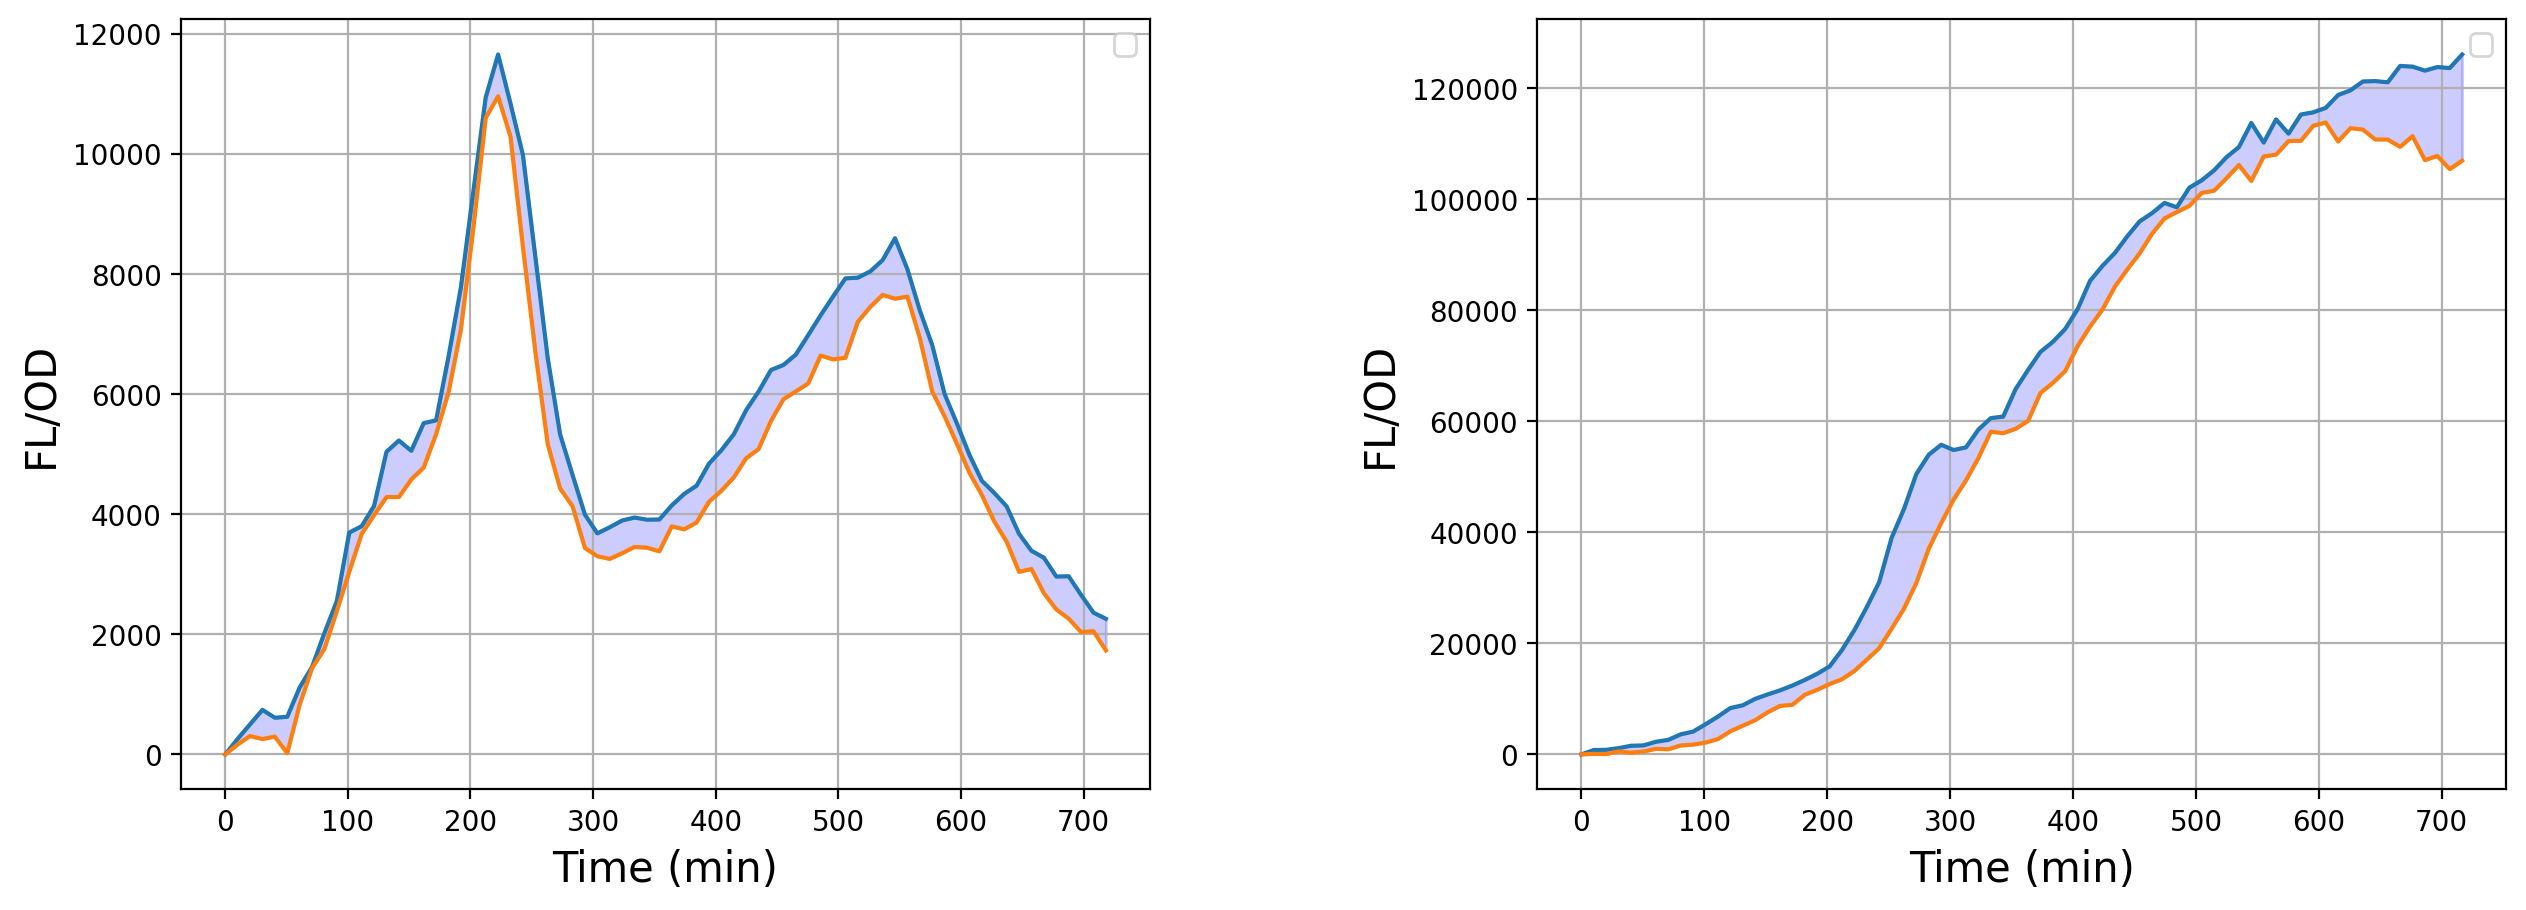

In [141]:
# PLot the confidence interval

fig, ax = plt.subplots(1,2, figsize = (15,5))
fig.subplots_adjust(wspace = 0.4)#, hspace = 0.1)

r = 0
ax[r].plot(time12[:tf_I], conf_int_deg_pos[:tf_I])
ax[r].plot(time12[:tf_I], conf_int_deg_neg[:tf_I])
ax[r].fill_between(time12[:tf_I], conf_int_deg_neg[:tf_I], conf_int_deg_pos[:tf_I], color='blue', alpha=0.2)
ax[r].set_xlabel('Time (min)', fontsize = 15) ; ax[r].set_ylabel('FL/OD', fontsize = 15) ; ax[r].legend()
#ax[r,c].set_title('With Deg-tag') ; 
ax[r].grid(True)

r = 1
ax[r].plot(timeB12[:tf_I], conf_int_no_deg_pos[:tf_I])
ax[r].plot(timeB12[:tf_I], conf_int_no_deg_neg[:tf_I])
ax[r].fill_between(timeB12[:tf_I], conf_int_no_deg_neg[:tf_I], conf_int_no_deg_pos[:tf_I], color='blue', alpha=0.2)
ax[r].set_xlabel('Time (min)', fontsize = 15) ; ax[r].set_ylabel('FL/OD', fontsize = 15) ; ax[r].legend()
#ax[r,c].set_title('Without Deg-tag') ; 
ax[r].grid(True)

In [142]:
## Import the simulation run data from individual effective models

sol_deg_effective = pd.read_csv('simulation_run_data/Effective_model_deg_run_data_021325.csv').to_numpy()
sol_deg_effective = sol_deg_effective[:,1:]
sol_no_deg_effective = pd.read_csv('simulation_run_data/Effective_model_no_deg_run_data_021325.csv').to_numpy()
sol_no_deg_effective = sol_no_deg_effective[:,1:]

sol_deg_effective_hybrid_1 = pd.read_csv('simulation_run_data/Effective_CRN_hybrid_model_1_deg_run_data_021125.csv').to_numpy()
sol_deg_effective_hybrid_1 = sol_deg_effective_hybrid_1[:,1:]
sol_no_deg_effective_hybrid_1 = pd.read_csv('simulation_run_data/Effective_CRN_hybrid_model_1_no_deg_run_data_021125.csv').to_numpy()
sol_no_deg_effective_hybrid_1 = sol_no_deg_effective_hybrid_1[:,1:]

sol_deg_effective_hybrid_2 = pd.read_csv('simulation_run_data/Effective_CRN_hybrid_model_2_deg_run_data_021125.csv').to_numpy()
sol_deg_effective_hybrid_2 = sol_deg_effective_hybrid_2[:,1:]
sol_no_deg_effective_hybrid_2 = pd.read_csv('simulation_run_data/Effective_CRN_hybrid_model_2_no_deg_run_data_021125.csv').to_numpy()
sol_no_deg_effective_hybrid_2 = sol_no_deg_effective_hybrid_2[:,1:]



N_steps = 1000
t_final = 1000
time = np.linspace(0, t_final, N_steps)

tf_i = 720

### Cells below are used to create publication quality images

In [143]:
from matplotlib.font_manager import FontProperties
font = {'family' : 'Arial',
    'weight' : 'medium',
    'size'   : 8,
    'style'  : 'normal'}

import matplotlib 

matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.rm'] = 'Arial'
matplotlib.rcParams['mathtext.it'] = 'Arial'

matplotlib.rc('font', **font)
matplotlib.rc('text', usetex=False)

In [144]:
# Import CRN run data for comparison 

sol_deg_data_CRN = pd.read_csv('simulation_run_data/CRN_simulation_run_data_720min_deg_tag_030725.csv')
sol_no_deg_data_CRN = pd.read_csv('simulation_run_data/CRN_simulation_run_data_720min_no_deg_tag_030725.csv')
sol_deg_CRN = sol_deg_data_CRN['Folded_protein']
sol_no_deg_CRN = sol_no_deg_data_CRN['Folded_protein']
time_CRN = sol_no_deg_data_CRN['Time'].to_numpy()

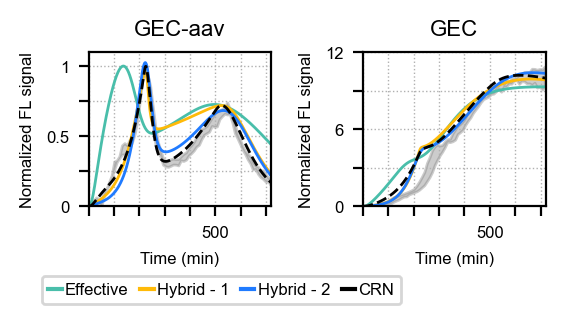

In [145]:
w,h = 2.95,1
#w,h = 8,3
fig, ax = plt.subplots(1,2, figsize = (w,h), sharex = 'col')
fig.subplots_adjust(wspace = 0.5, hspace = 0.2)
lwidth = 1
alp = 0.4


clr_eff = '#49beaa'        
clr_hybrid_2 = '#207bff'  
clr_hybrid_1 =  '#ffba08' 


r = 0
ax[r].fill_between(time12[:tf_I], conf_int_deg_neg[:tf_I]/np.max(A3_non_leaky), conf_int_deg_pos[:tf_I]/np.max(A3_non_leaky), color = 'grey', alpha = alp)

ax[r].plot(time[:tf_i], sol_deg_effective[:tf_i,2]/np.max(sol_deg_CRN), label = "Effective", color = clr_eff, linewidth = lwidth)
ax[r].plot(time[:tf_i], sol_deg_effective_hybrid_1[:tf_i,3]/np.max(sol_deg_CRN), label = "Hybrid - 1", color = clr_hybrid_1, linewidth = lwidth)
ax[r].plot(time[:tf_i], sol_deg_effective_hybrid_2[:tf_i,3]/np.max(sol_deg_CRN), label = "Hybrid - 2", color = clr_hybrid_2, linewidth = lwidth)
ax[r].plot(time_CRN[:tf_i], sol_deg_CRN[:tf_i]/np.max(sol_deg_CRN), '--', label = "CRN Model", color = 'black', linewidth = lwidth)

ax[r].set_xlabel('Time (min)', fontsize = 6) ;ax[r].set_ylabel('Normalized FL signal', fontsize = 6) ; 
ax[r].grid(True) ; ax[r].set_xlim([0, time[tf_i]]) ; ax[r].set_ylim([0, 1.1])
ax[r].set_title('GEC-aav', fontsize = 8)
ax[r].tick_params(axis='y', labelsize=6)

r = 1
ax[r].fill_between(timeB12[:tf_I], conf_int_no_deg_neg[:tf_I]/np.max(A3_non_leaky), conf_int_no_deg_pos[:tf_I]/np.max(A3_non_leaky), color = 'grey', alpha = alp)

ax[r].plot(time[:tf_i], sol_no_deg_effective[:tf_i,2]/np.max(sol_deg_CRN), label = "Effective", color = clr_eff, linewidth = lwidth)
ax[r].plot(time[:tf_i], sol_no_deg_effective_hybrid_1[:tf_i,3]/np.max(sol_deg_CRN), label = "Hybrid - 1", color = clr_hybrid_1, linewidth = lwidth)
ax[r].plot(time[:tf_i], sol_no_deg_effective_hybrid_2[:tf_i,3]/np.max(sol_deg_CRN), label = "Hybrid - 2", color = clr_hybrid_2, linewidth = lwidth)
ax[r].plot(time_CRN[:tf_i], sol_no_deg_CRN[:tf_i]/np.max(sol_deg_CRN), '--',  label = "CRN Model", color = 'black', linewidth = lwidth)

ax[r].set_xlabel('Time (min)', fontsize = 6) ; ax[r].set_ylabel('Normalized FL signal', fontsize = 6) ;
ax[r].grid(True) ; ax[r].set_xlim([0, time[tf_i]]) ; ax[r].set_ylim([0, 12])
ax[r].set_title('GEC', fontsize = 8)
ax[r].tick_params(axis='y', labelsize=6)

# Setting ticks at intervals of 100, but showing only 500 on the x-axis
tick_interval = 100
show_tick = 500  # Tick to be labeled
ticks = list(range(0, int(time[tf_i])+1, tick_interval))  # Generate tick locations
labels = [str(tick) if tick == show_tick else '' for tick in ticks]  # Only label the 500 mark

for r in range(2):  # Apply to both subplots
    ax[r].set_xticks(ticks)
    ax[r].set_xticklabels(labels, fontsize=6)

# Set 5 ticks on y-axis with specific labels for each subplot
for r in range(2):  # Apply to both subplots
    if r == 0:
        y_ticks = np.linspace(0, 1, 5)  # Generate 5 ticks between 0 and 1
        y_labels = ['0', '', '0.5', '', '1']  # Custom labels
    elif r == 1:
        y_ticks = np.linspace(0, 12, 5)  # Generate 5 ticks between 0 and 12
        y_labels = ['0', '', '6', '', '12']  # Custom labels

    ax[r].set_yticks(y_ticks)  # Set y-ticks
    ax[r].set_yticklabels(y_labels, fontsize=6)  # Set custom labels
    ax[r].grid(True, linestyle=':', linewidth=0.5)  # Dotted grid lines
    ax[r].tick_params(axis='y', labelsize=6)
  
# Custom legend handles with smaller lines
lwd_legend = 1.5
custom_handles = [
    Line2D([0], [0], color = clr_eff, lw = lwd_legend, label = "Effective"),          # Smaller line width
    Line2D([0], [0], color = clr_hybrid_1, lw = lwd_legend, label = "Hybrid - 1"),
    Line2D([0], [0], color = clr_hybrid_2, lw = lwd_legend, label = "Hybrid - 2"),
    Line2D([0], [0], color='black', lw = lwd_legend, label = "CRN") ]

#handles, labels = ax[0].get_legend_handles_labels()
fig.legend(handles = custom_handles, loc = 'lower center', 
           bbox_to_anchor = (0.35,-0.42), fontsize = 6, 
           handlelength = 0.8, ncol = 4,
           handletextpad = 0.2, columnspacing = 0.7)
#fig.savefig('Effective_model_comparison.svg', dpi = 300, bbox_inches='tight') ## Uncomment to save figure